In [27]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import nibabel as nib
import numpy.ma as ma
from numpy import savetxt
import os
#set up working directories
outDir = '/host/percy/local_raid/hans/amyg/hist/outputs/'

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [18]:
#input variables
res='100'
side='L'

In [19]:
# load mask to clean off all background data from feature data
# pick different masks depending on the cropping size
maskNif = nib.load(outDir+'amyg_'+side+'_'+res+'um_mask-bin-vF_ero5.nii.gz')
mask = np.array(maskNif.dataobj)

#turn mask into a list
maskBin = np.where(mask == 1, 0, 1)
maskBin = maskBin.tolist()

In [20]:
#Load UMAP embeddings
nn=15
md=0.1
path = str(outDir+res+'umUMAPembeddings_'+side+'_amyg_ero5_1sd.csv')
embedding=np.loadtxt(path,delimiter=',')

In [21]:
print(len(embedding[:,0]))

674608


In [22]:
#create matrix with corresponding coordinates for each U1/2 values in order to create colormap for UMAP projections
coords=np.zeros((len(embedding[:,0]),8))
num=0
for i in range(len(mask[:,1,1])):
    for j in range(len(mask[1,:,1])):
        for k in range(len(mask[1,1,:])):
            if mask[i,j,k] == 1:
                coords[num,0]=i
                coords[num,1]=j
                coords[num,2]=k
                coords[num,3]=embedding[num,0]
                coords[num,4]=embedding[num,1]
                num=num+1
print(num)

674608


In [23]:
from sklearn import preprocessing
#colour2gradients function in python
U1=coords[:,3]
U2=coords[:,4]
#U1,U2=list(range(10)),list(range(10))
U1peak=max(U1)
U2min=min(U2)
U2max=max(U2)
colourness = np.zeros((len(U1),3))
clr_vals = np.zeros((len(U1),3))
for ii in range(len(U1)):
    if U1[ii] > 0:
        colourness[ii,0] = 1 - U1peak - U1[ii]
    else:
        colourness[ii,0] = 1 - U1peak + abs(U1[ii])
        
    if U2[ii] > 0:
        colourness[ii,1] = 1 - abs(U2min) + U2[ii]
        colourness[ii,2] = 1 - U2max - U2[ii]
    else:
        colourness[ii,1] = 1 - abs(U2min) - abs(U2[ii])
        colourness[ii,2] = 1 - U2max + abs(U2[ii])

for col in range(3):
    minc=min(colourness[:,col])
    maxc=max(colourness[:,col]-minc)
    clr_vals[:,col] = (colourness[:,col] - minc)/maxc

In [24]:
#SAVE .CSV FILE WITH ALL THE COLORS IN THE RIGHT COORDINATES
coords[:,5:8] = clr_vals
print(coords[:10])
savetxt(outDir+res+'um_colorspectrum'+'_'+side+'_ero5_1sd.csv',clr_vals, delimiter=',')

[[ 44.          95.         123.           1.85832572  -7.0779953
    0.64751296   0.22268735   0.77731265]
 [ 45.          94.         123.           1.87785959  -7.07705879
    0.64689117   0.22272184   0.77727816]
 [ 45.          94.         124.           1.86707926  -7.07542181
    0.64723432   0.22278212   0.77721788]
 [ 45.          95.         122.           1.90411532  -7.06816673
    0.64605541   0.22304929   0.77695071]
 [ 45.          95.         123.           1.89245594  -7.06944227
    0.64642655   0.22300232   0.77699768]
 [ 45.          95.         124.           1.85554755  -7.06846523
    0.64760139   0.2230383    0.7769617 ]
 [ 45.          96.         122.           1.90257037  -7.05830622
    0.64610459   0.22341241   0.77658759]
 [ 45.          96.         123.           1.89264953  -7.06624269
    0.64642038   0.22312015   0.77687985]
 [ 46.          94.         123.           1.86977816  -7.07136679
    0.64714841   0.22293145   0.77706855]
 [ 46.          94. 

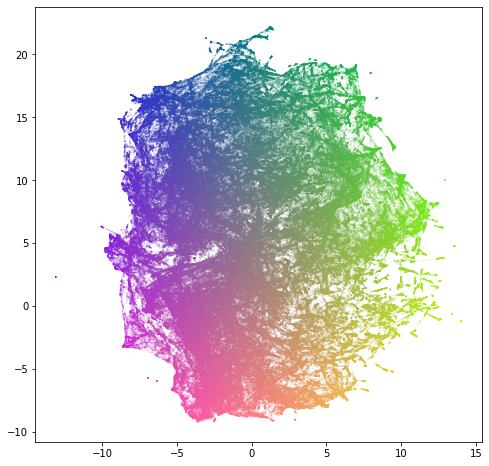

In [25]:
#project UMAP embeddings as scatter plot
plt.figure(figsize=(8,8))
plt.scatter(
    embedding[:, 1],
    embedding[:, 0],
    c = clr_vals,
    #cmap = 'viridis',
    alpha=1,
    s=.01)
#plt.colorbar()
plt.show
plt.savefig("2Dclrbar_UMAP_"+side+"_"+res+"um_ero5_1sd")

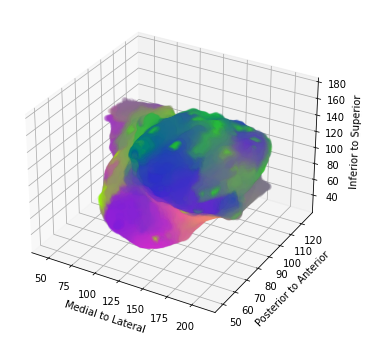

In [26]:
plt.rcParams["figure.figsize"] = [12, 6]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#z, x, y = data.nonzero()
ax.scatter(coords[:,0], coords[:,1], coords[:,2], c=clr_vals, alpha=0.1)
ax.set_xlabel('Medial to Lateral')
ax.set_ylabel('Posterior to Anterior')
ax.set_zlabel('Inferior to Superior')
plt.show()